In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.formula.api as smf

C:\Softwares\Anaconda3\envs\pytorch_gpu\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [3]:
merged = pd.read_csv('raters.csv')

Text(0, 0.5, 'proportion of republican statement rated as false(y)')

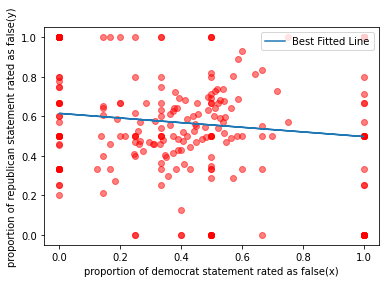

In [5]:
coef = np.polyfit(merged['demo_false_proportion'], merged['repub_false_proportion'],1)

poly1d_fn = np.poly1d(coef)

plt.plot(merged['demo_false_proportion'], merged['repub_false_proportion'], 'ro', alpha = 0.5)
plt.plot(merged['demo_false_proportion'], poly1d_fn(merged['demo_false_proportion']), label = 'Best Fitted Line')
plt.legend(loc = 'upper right')

plt.xlabel('proportion of democrat statement rated as false(x)')
plt.ylabel('proportion of republican statement rated as false(y)')

In [6]:
pearsonr(merged['demo_false_proportion'], merged['repub_false_proportion'])

(-0.13360102098360568, 0.03402135938065294)

Text(0, 0.5, 'averaged sentiment score(y)')

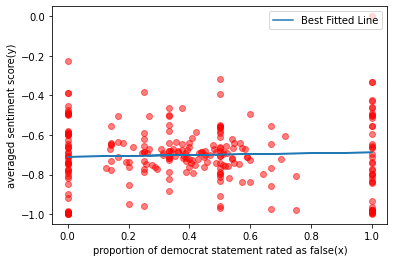

In [10]:
coef = np.polyfit(merged['demo_false_proportion'], merged['sentiment_score'],1)

poly1d_fn = np.poly1d(coef)

plt.plot(merged['demo_false_proportion'], merged['sentiment_score'], 'ro', alpha = 0.5)
plt.plot(merged['demo_false_proportion'], poly1d_fn(merged['demo_false_proportion']), label = 'Best Fitted Line')
plt.legend(loc = 'upper right')

plt.xlabel('proportion of democrat statement rated as false(x)')
plt.ylabel('averaged sentiment score(y)')

Text(0, 0.5, 'averaged topic score(y)')

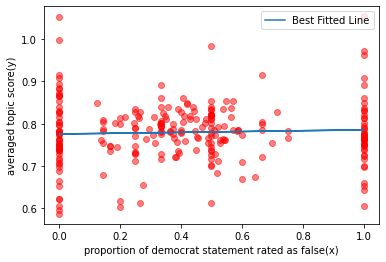

In [11]:
coef = np.polyfit(merged['demo_false_proportion'], merged['topic_score'],1)

poly1d_fn = np.poly1d(coef)

plt.plot(merged['demo_false_proportion'], merged['topic_score'], 'ro', alpha = 0.5)
plt.plot(merged['demo_false_proportion'], poly1d_fn(merged['demo_false_proportion']), label = 'Best Fitted Line')
plt.legend(loc = 'upper right')

plt.xlabel('proportion of democrat statement rated as false(x)')
plt.ylabel('averaged topic score(y)')

In [12]:
model = smf.ols(formula='demo_false_proportion ~ repub_false_proportion + sentiment_score', data = merged).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     demo_false_proportion   R-squared:                       0.018
Model:                               OLS   Adj. R-squared:                  0.010
Method:                    Least Squares   F-statistic:                     2.290
Date:                   Sun, 22 May 2022   Prob (F-statistic):              0.103
Time:                           23:24:50   Log-Likelihood:                -77.013
No. Observations:                    252   AIC:                             160.0
Df Residuals:                        249   BIC:                             170.6
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.5283      0.094      5.624      0.000       0.343       0.713
repub_false_proportion    -0.1483      0.074     -2.017      0.045      -0.293      -0.004
sentiment_score            0.0304      0.131      0.232      0.816      -0.228       0.288
==============================================================================
Omnibus:                       20.467   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.092
Skew:                           0.521   Prob(JB):                     0.000320
Kurtosis:                       2.333   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
model = smf.ols(formula='demo_false_proportion ~ repub_false_proportion + topic_score', data = merged).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     demo_false_proportion   R-squared:                       0.019
Model:                               OLS   Adj. R-squared:                  0.011
Method:                    Least Squares   F-statistic:                     2.368
Date:                   Sun, 22 May 2022   Prob (F-statistic):             0.0958
Time:                           23:25:06   Log-Likelihood:                -76.936
No. Observations:                    252   AIC:                             159.9
Df Residuals:                        249   BIC:                             170.5
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.4005      0.244      1.644      0.101      -0.079       0.880
repub_false_proportion    -0.1478      0.072     -2.048      0.042      -0.290      -0.006
topic_score                0.1362      0.300      0.454      0.650      -0.454       0.727
==============================================================================
Omnibus:                       20.384   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.983
Skew:                           0.519   Prob(JB):                     0.000338
Kurtosis:                       2.333   Cond. No.                         25.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
model = smf.ols(formula='demo_false_proportion ~ repub_false_proportion + sentiment_score + topic_score', data = merged).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     demo_false_proportion   R-squared:                       0.019
Model:                               OLS   Adj. R-squared:                  0.007
Method:                    Least Squares   F-statistic:                     1.582
Date:                   Sun, 22 May 2022   Prob (F-statistic):              0.194
Time:                           23:25:13   Log-Likelihood:                -76.922
No. Observations:                    252   AIC:                             161.8
Df Residuals:                        248   BIC:                             176.0
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.4204      0.271      1.551      0.122      -0.113       0.954
repub_false_proportion    -0.1452      0.074     -1.962      0.051      -0.291       0.001
sentiment_score            0.0224      0.133      0.169      0.866      -0.239       0.283
topic_score                0.1289      0.304      0.425      0.672      -0.469       0.727
==============================================================================
Omnibus:                       20.426   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.971
Skew:                           0.518   Prob(JB):                     0.000340
Kurtosis:                       2.331   Cond. No.                         30.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""